## Mercari Price Prediction Challenge

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**


In [0]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Reading Data.


In [0]:
project_data = pd.read_csv("/content/drive/My Drive/Classroom/train.tsv", sep='\t')

In [6]:
print("Shape of Project data :",project_data.shape)
print("--------------------------------------")
print("Number of rows :", len(project_data))
print("--------------------------------------")
print("Number of columns :", project_data.shape[1])
print("--------------------------------------")
print("Colummns : ",project_data.columns)

Shape of Project data : (1482535, 8)
--------------------------------------
Number of rows : 1482535
--------------------------------------
Number of columns : 8
--------------------------------------
Colummns :  Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')


In [0]:
project_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


Columns : 
1. Name
2. item condition 
3. Category name 
4. brand name 
5. price
6. shipping
7. item_description


## **1.2 Checking for Null Values and irregularities in the data.**

In [0]:
project_data.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

# **Columns : Category name, Brand name, item description has NAN values.**

In [0]:
# Function to check null values in the respective columns.

def check_null(column_name):

  nan_ids_name =[] # Variable to store the Nan's 

  for i in range(len(project_data[column_name])):
    if isinstance(project_data[column_name].values[i],float):
      if np.isnan(project_data[column_name].values[i]): 
        nan_ids_name.append(i)

  return len(nan_ids_name) # return the length of the nan_ids

## a. Name 

In [0]:
print(check_null("name"))

0


## b. Item condition

In [0]:
print(check_null("item_condition_id"))

0


## c. Categoy_name

In [0]:
print(check_null("category_name"))

6327


## d. item_decsription

In [0]:
item_desc_count = 0
no_desc = list()
a = str('No description yet') 
for i in range(len(project_data["item_description"])):
    
    if str(project_data['item_description'].values[i]) in str(a):
        #print(project_data['item_description'].values[i])
        no_desc.append(i)
        #print("True")
        item_desc_count+=1
        
print("Total number of rows which has the text no description",item_desc_count) # Count of total rows which has No description yet text.

Total number of rows which has the text no description 82517


In [0]:
print(check_null("item_description"))

4


## e. Brand name

In [0]:
print(check_null("brand_name"))

632682


## f. item_condition

In [0]:
print(check_null("item_condition_id"))

0


## g. price

In [0]:
print(check_null("price"))

0


## h. Shipping

In [0]:
print(check_null("shipping"))

0


### ----------------------------------------------------------------------------------------
### 1. We can Notice that we have 82517 rows which has no description for the column Item Description.
### 2. We can Notcie that we have 632682 rows which has no Brand Name for the column Brand Name.
### 3. We can Notice that we have 6327 rows which has no category name and 4 NAN values.
### ----------------------------------------------------------------------------------------


## **1.3 Filling missing values**

In [0]:
# Function to fill the Missing Values in the dataset.

def filling_missing_values(pr_data):
  
    pr_data.category_name.fillna(value = "others", inplace = True) # Filling Category column with Others in place of NAN
    pr_data.brand_name.fillna(value = "unknown brand", inplace = True) # Filling brand_name column with Unknown Brand in place of NAN
    pr_data.item_description.fillna(value = "No description yet", inplace =True) # Filling Item_description column with No Description in place of NAN.
    return pr_data

project_data = filling_missing_values(project_data)
project_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown brand,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown brand,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown brand,44.0,0,Complete with certificate of authenticity


# **After Filling the Missing values We Re-check if there are any null values**

In [0]:
project_data.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool

We now have the data without any null values.

## 1.4 Exploratory Data Analysis.

In [0]:
# Function that returns Unique Values from a given List.
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 

    for x in list1: 
      
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

## a. Feature Name : Category name - Main category. 

number of unique values in the Category Column: 11


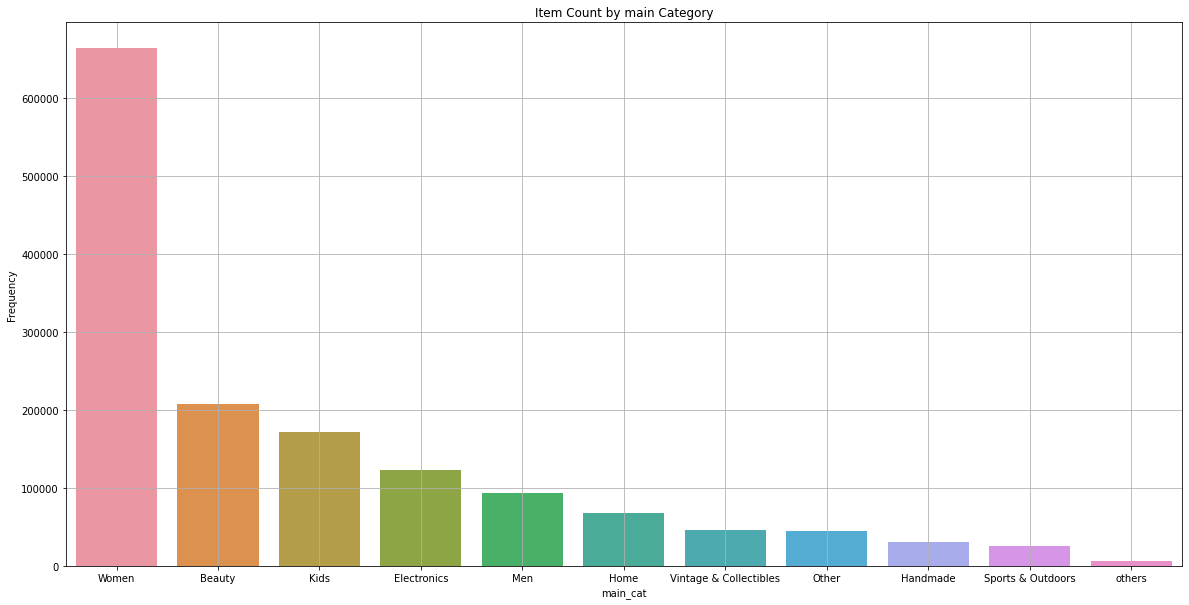

In [0]:
# As There are sub and sub-sub categories in the Column Category_name. We now examine the Main-Category for EDA 

main_cat = [] # Store all the main_category values 

for i in range(len(project_data)):
    main_cat.append(project_data['category_name'].values[i].split("/")[0])
len(main_cat)

main_cat_u = unique(main_cat) # Get unique data from the list.

print("number of unique values in the Category Column:",len(main_cat_u))

data = pd.DataFrame(main_cat_u)
ful_data = pd.DataFrame(main_cat, columns = ["main_cat"])

#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'main_cat', data = ful_data, ax = ax, order = pd.value_counts(ful_data['main_cat']).iloc[:11].index)
plt.title("Item Count by main Category")
plt.grid()
plt.ylabel("Frequency")
plt.show()

# **Observation**
### 1. From the Histogram, we can see that Majority of the categories belong to Women. And So, the sub categories sub-sub categories might also be related to women. 
### 2. Men have very less products compared to Women.

## b. Feature Name : Sub category. 

number of unique values in the Sub Category Column: 113


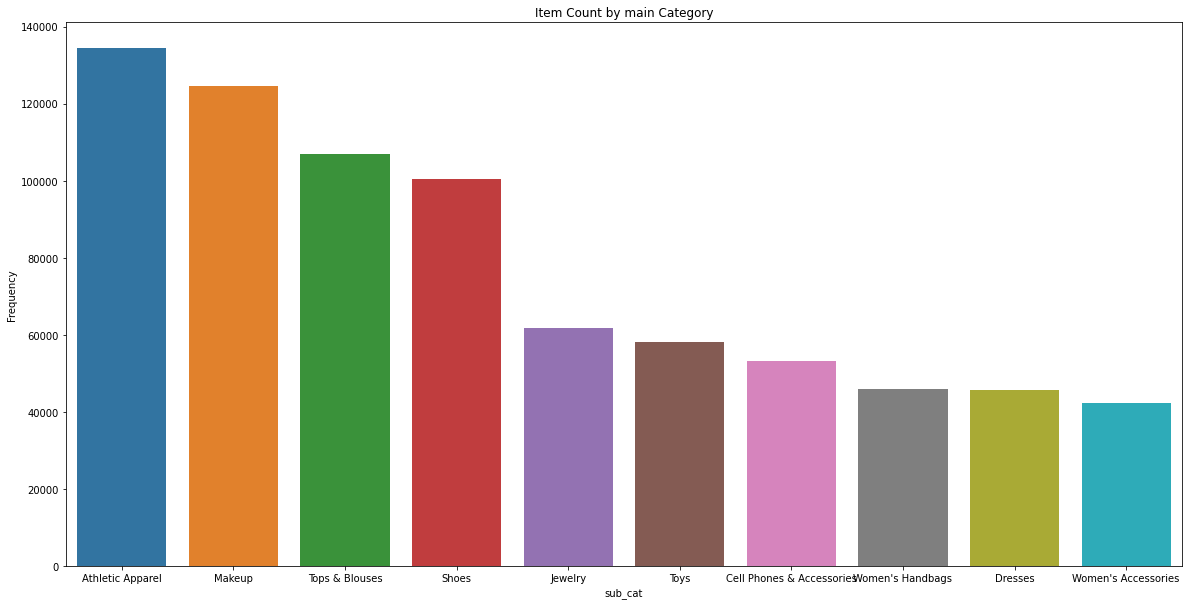

In [0]:
# As There are sub and sub-sub categories in the Column Category_name. We now examine the Sub-Category for EDA.

sub_cat = [] # Store all the sub_category values 

for i in range(len(project_data)):
    try:
        sub_cat.append(project_data['category_name'].values[i].split("/")[1])
    except:
        continue
        
len(sub_cat)
sub_cat_u = unique(sub_cat)

print("number of unique values in the Sub Category Column:",len(sub_cat_u))

data = pd.DataFrame(sub_cat_u)
ful_data = pd.DataFrame(sub_cat, columns = ["sub_cat"])
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'sub_cat', data = ful_data, ax = ax, order = pd.value_counts(ful_data['sub_cat']).iloc[:10].index)
plt.title("Item Count by main Category")
plt.ylabel("Frequency")
plt.show()

# **Observation**
## 1. As there are 113 unique values we have sorted top 10 for Eda.
## 2. Both Men and Women Wear Atheletic Appearal and also, Previosly we have seen that Women tops in the main category histogram. Following the previous data it is evident that Makeup tops second in the Sub - Category and followed by Tops and Blouses. 
## 3. Top 10 Sub categories belong to Wome category.

## C. Feature Name : Sub-Sub category. 

number of unique values in the Sub Sub Category Column: 870


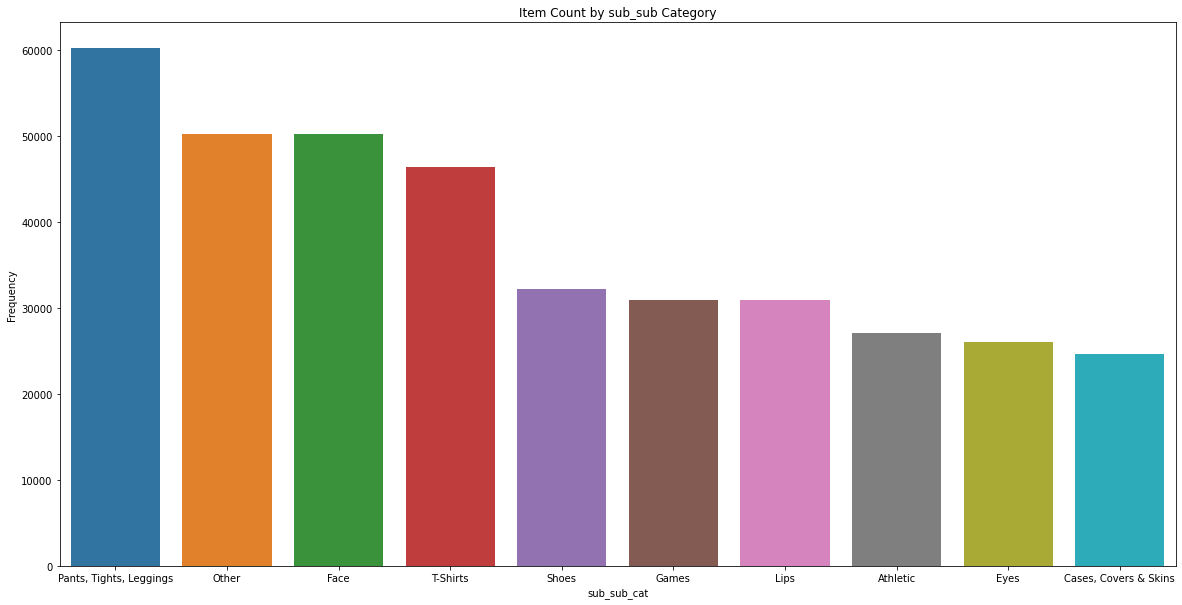

In [0]:
# As There are sub and sub-sub categories in the Column Category_name. We now examine the Sub-Sub-Category for EDA.

sub_sub_cat = [] # Store all the sub_sub_category values 

for i in range(len(project_data)):
    try:
        sub_sub_cat.append(project_data['category_name'].values[i].split("/")[2])
    except:
        continue
        
sub_sub_cat_u = unique(sub_sub_cat)
print("number of unique values in the Sub Sub Category Column:",len(sub_sub_cat_u))

data = pd.DataFrame(sub_sub_cat_u)
ful_data = pd.DataFrame(sub_sub_cat, columns = ["sub_sub_cat"])
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'sub_sub_cat', data = ful_data, ax = ax, order = pd.value_counts(ful_data['sub_sub_cat']).iloc[:10].index)
plt.title("Item Count by sub_sub Category")
plt.ylabel("Frequency")
plt.show()

# **Observation**
## 1. As we can see Top 10 Products in the data belong to the Female category.

## d. Feature name  : BRAND NAME 

No.of Unique brands are : 4810


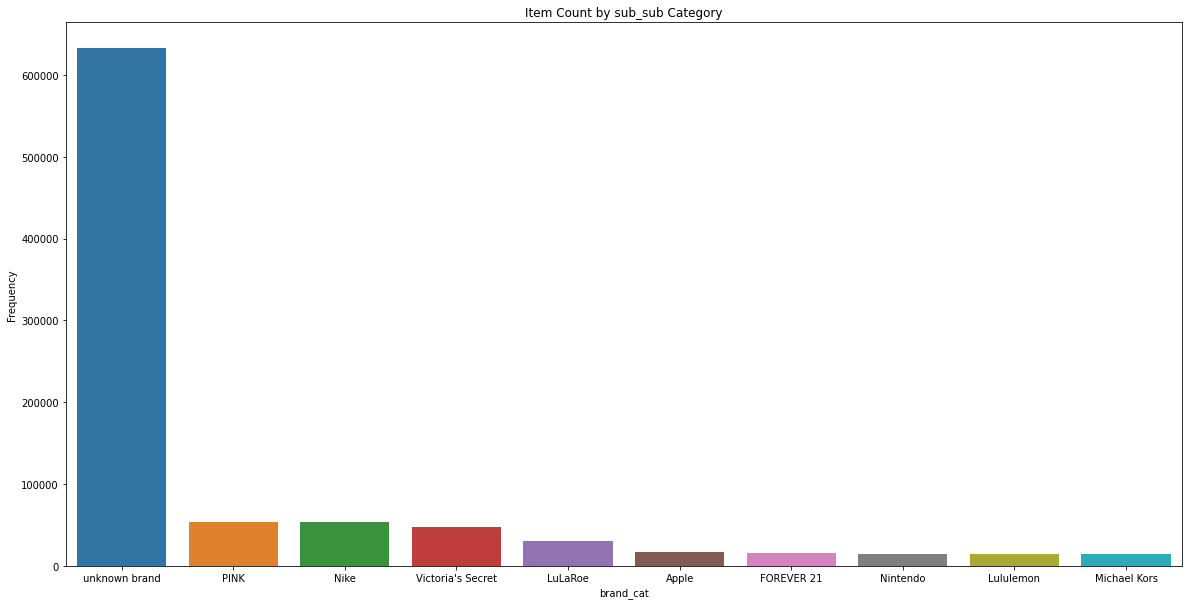

In [0]:
# performing EDA on Brand name. There Could be Various brands and the count might also be large.

brand_name = []

for i in range(len(project_data)):
    brand_name.append(project_data['brand_name'].values[i])

brand_name_u = unique(brand_name)

print("No.of Unique brands are :",len(brand_name_u))

data = pd.DataFrame(brand_name_u)
ful_data = pd.DataFrame(brand_name, columns = ["brand_cat"])
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (20,10))
sns.countplot(x = 'brand_cat', data = ful_data, ax = ax, order = pd.value_counts(ful_data['brand_cat']).iloc[:10].index)
plt.title("Item Count by sub_sub Category")
plt.ylabel("Frequency")
plt.show()

# **Observation**
## 1. Unknown Brand is the name given to all the NAN values. 
## 2. Pink, Nike and Victoria's secret belong to the Women Category.
## 3. In the top ten brand names we even have brands which are sub category of Electronic equipements.
## 4. As majority of the women purchase Apple Mobile phone, it is under 10 ten of the Brand names.

# **c.Feature name : Price**


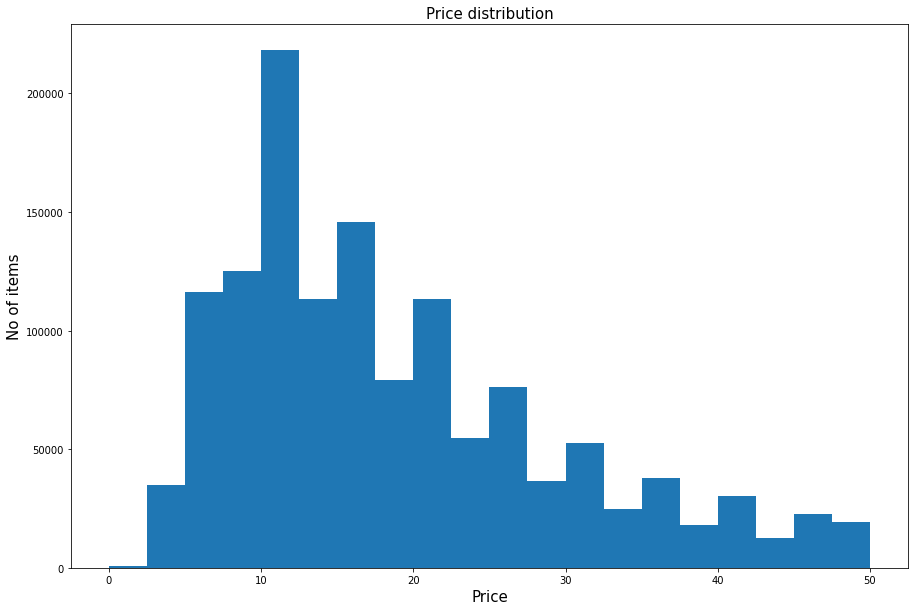

In [0]:
# Plotting Histogram
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(project_data.price, bins=20 ,range=[0,50])
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('Price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.show()

# **Observation**
## 1. As we can see we cannot interpret the data concisely we perform Log normal on Price data to get the distribution.

# **The Units are USD.**
# Majority of the products fall in the range of 5$ - 20$ Dollars




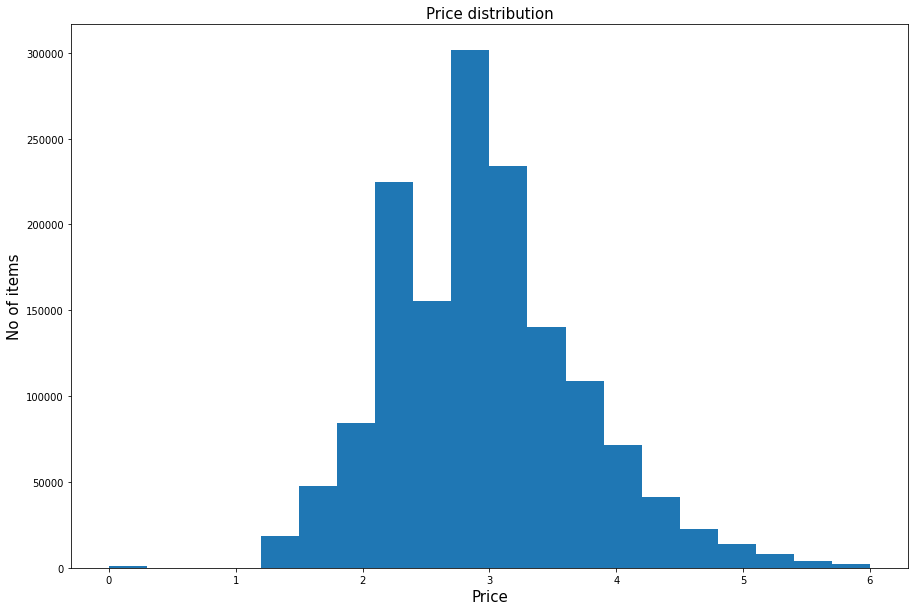

In [0]:
# Plotting Histogram

y = np.log(project_data["price"]+1)

fig, ax = plt.subplots(figsize=(15,10))
ax.hist(y, bins=20, range=[0,6])
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('Price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.show()

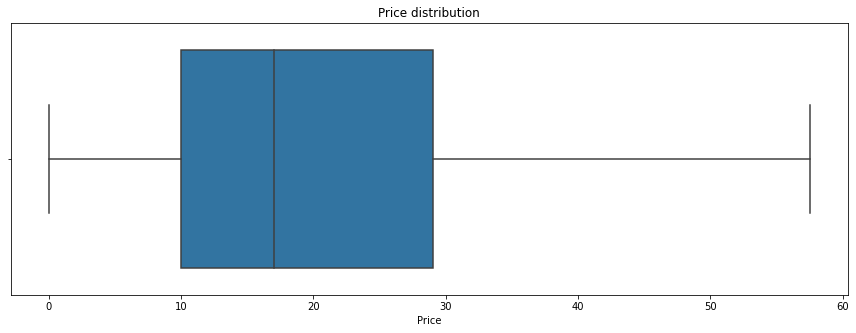

In [0]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Price distribution')
sns.boxplot(project_data.price,showfliers=False)
ax.set_xlabel('Price')

plt.show()

# **d. Feature Name: Shipping**
0 Paid by seller
1 Paid by buyer

In [0]:
print(project_data.shipping.value_counts())

0    819435
1    663100
Name: shipping, dtype: int64


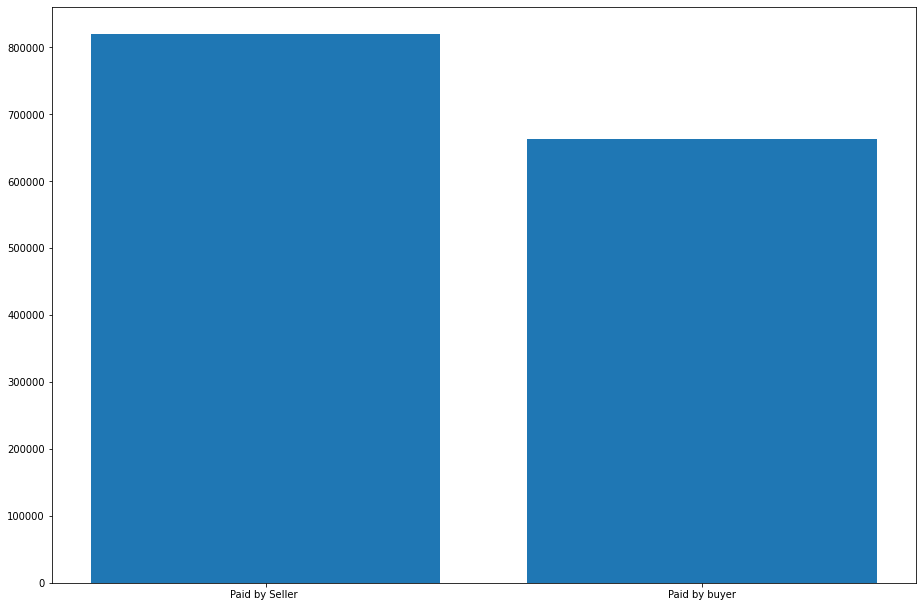

In [21]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,2,2])
langs = ['Paid by Seller ', 'Paid by buyer']
students =  project_data.shipping.value_counts()
ax.bar(langs,students)
plt.show()

# **Observation:**
# Majority of the shipping charges are being taken up by Sellers 
# In the remaining cases the shipping charges are paid by buyers.

In [0]:
# We will examine the price distribution of the purchases made by buyer and also the seller

In [0]:
chargedby_seller = []
chargedby_buyer= []
for i in tqdm(range(0,len(project_data['shipping']))):
    if project_data['shipping'][i]==0:
        chargedby_seller.append(project_data['price'][i])
    else:
        chargedby_buyer.append(project_data['price'][i])

100%|██████████| 1482535/1482535 [00:54<00:00, 27006.71it/s]


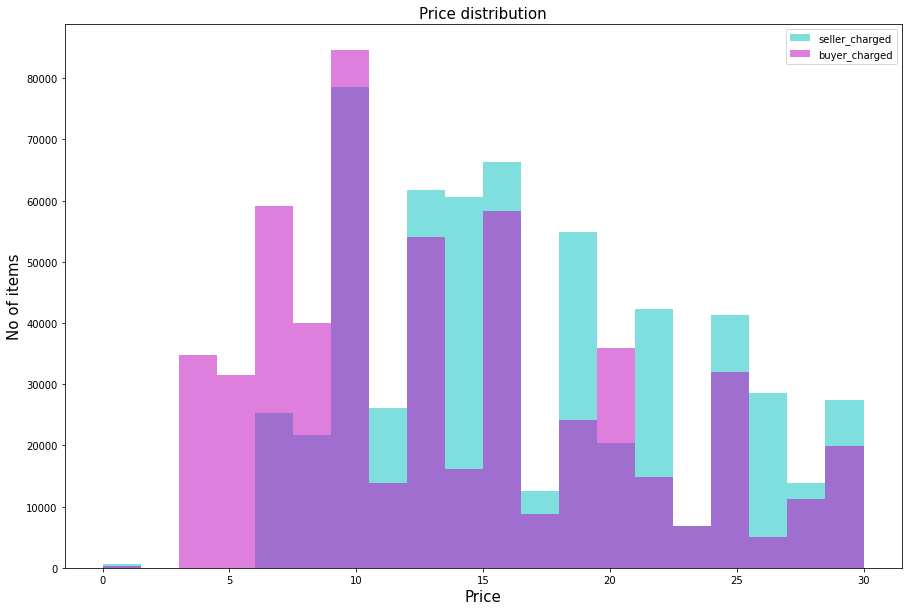

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(chargedby_seller,bins=20,range=[0, 30],label="seller_charged",color='c',alpha=0.5)
ax.hist(chargedby_buyer,bins=20,range=[0, 30],label="buyer_charged",color='m',alpha=0.5)
plt.title('Price distribution', fontsize=15)
ax.set_xlabel('Price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.legend(loc='upper right')
plt.show()

# **Observation:**
# 1. shipping charges for the Products which are less expensive are paid by the buyers.
# 2. Shipping charges for the products which are expensive are paid by the sellers.

## e. Feature name : ITEM DESCRIPTION

As the feature Item_description contains text data, we will plot word cloud to see most repeated words.

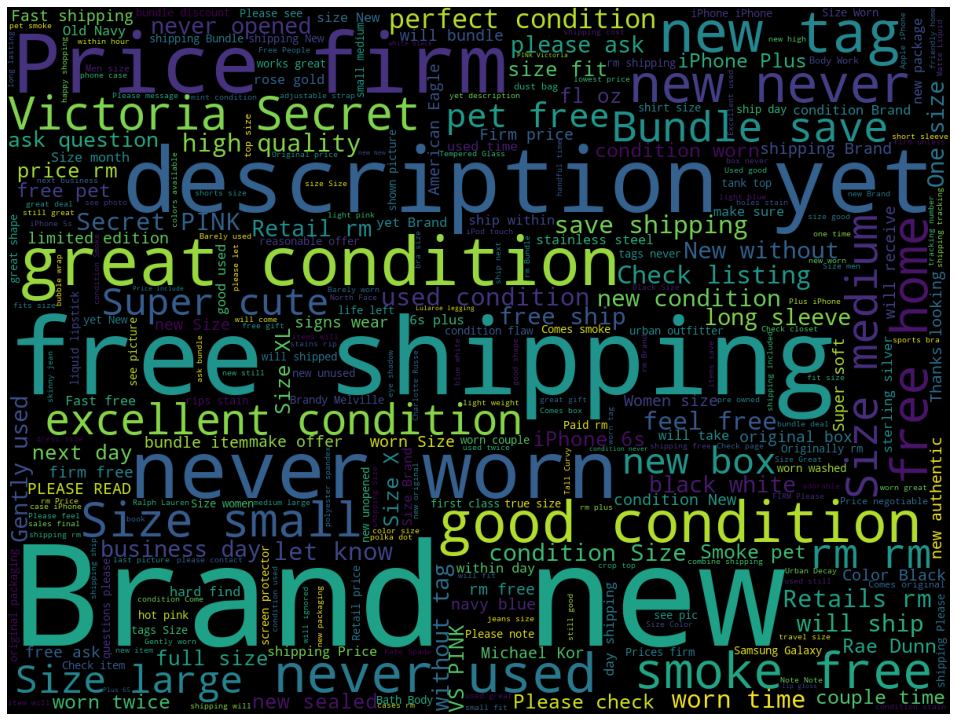

In [0]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud 
wc = WordCloud(max_words=300,width = 1200, height = 900).generate(" ".join(project_data.item_description.astype(str)))
plt.figure(figsize = (18, 13))
plt.imshow(wc)
plt.axis("off")
plt.show()

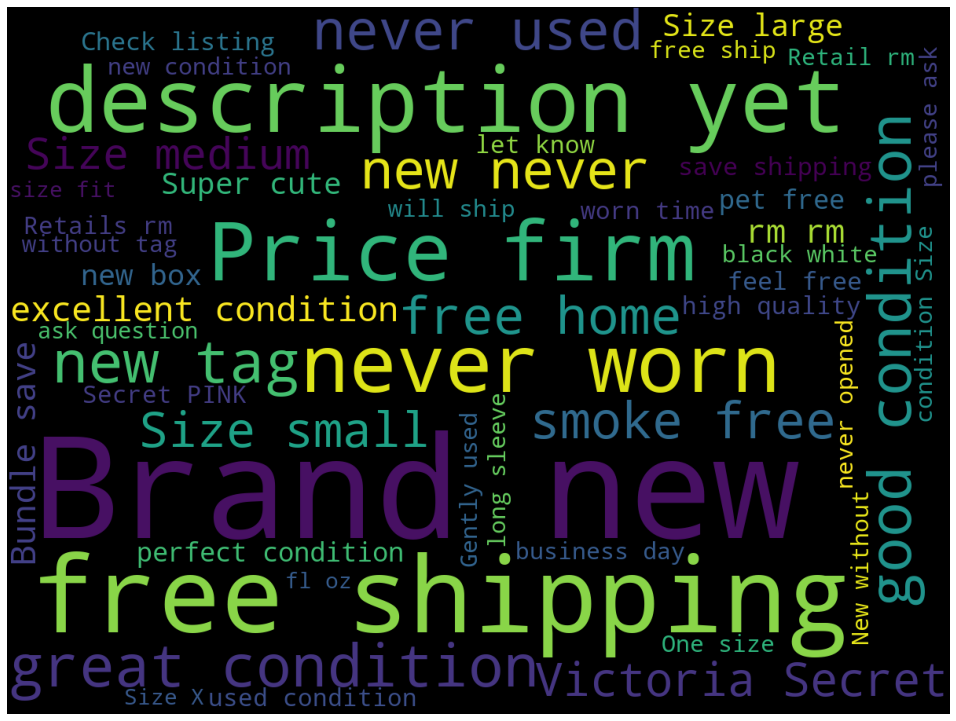

In [0]:
#https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud 
wc = WordCloud(max_words=50,width = 1200, height = 900).generate(" ".join(project_data.item_description.astype(str)))
plt.figure(figsize = (18, 13))
plt.imshow(wc)
plt.axis("off")
plt.show()

# **Observation:**
# 1. Majority of the words Such as : Brand new, Free Shipping,Never Worn, Great Condition, Good Condition Are repeated often. 

## 1.5 Text Preprocessing.

In [0]:
# Converting text data to lower case.
lower = project_data['item_description'].map(lambda x: x.lower())
lower

0                                         no description yet
1          this keyboard is in great condition and works ...
2          adorable top with a hint of lace and a key hol...
3          new with tags. leather horses. retail for [rm]...
4                  complete with certificate of authenticity
                                 ...                        
1482530    lace, says size small but fits medium perfectl...
1482531     little mermaid handmade dress never worn size 2t
1482532            used once or twice, still in great shape.
1482533    there is 2 of each one that you see! so 2 red ...
1482534    new with tag, red with sparkle. firm price, no...
Name: item_description, Length: 1482535, dtype: object

In [0]:
project_data = project_data.drop(columns = 'item_description')
project_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown brand,10.0,1
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown brand,35.0,1
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown brand,44.0,0


In [0]:
project_data["item_description"] = lower

In [0]:
project_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown brand,10.0,1,no description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,this keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown brand,35.0,1,new with tags. leather horses. retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown brand,44.0,0,complete with certificate of authenticity


In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
cleaned_item_description = []
for a in tqdm(project_data["item_description"]):
    b = decontracted(a)
    b = b.replace('\\r', ' ')
    b = b.replace('\\"', ' ')
    b = b.replace('\\n', ' ')
    b = re.sub('[^A-Za-z0-9]+', ' ', b)
    b = ' '.join(f for f in b.split() if f not in stopwords)
    cleaned_item_description.append(b.lower().strip())

100%|██████████| 1482535/1482535 [01:48<00:00, 13652.20it/s]


In [0]:
len(cleaned_item_description)

1482535

In [0]:
cleaned_item_description[:5]

['no description yet',
 'keyboard great condition works like came box ports tested work perfectly lights customizable via razer synapse app pc',
 'adorable top hint lace key hole back pale pink 1x also 3x available white',
 'new tags leather horses retail rm stand foot high sold pair questions please ask free shipping got storage',
 'complete certificate authenticity']

In [0]:
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.downloader.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

neg = []
neu = []
pos = []
compound = []
for a in tqdm(cleaned_item_description) :
    neg_value = sid.polarity_scores(a)['neg']
    neu_value = sid.polarity_scores(a)['neu']  
    pos_value = sid.polarity_scores(a)['pos']
    comp_value = sid.polarity_scores(a)['compound']
    neg.append(neg_value)
    neu.append(neu_value)
    pos.append(pos_value)
    compound.append(comp_value)

  0%|          | 0/1482535 [00:00<?, ?it/s]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


100%|██████████| 1482535/1482535 [26:00<00:00, 949.83it/s]


In [0]:
project_data['neg'] = neg
project_data['neu'] = neu
project_data['pos'] = pos
project_data['compound'] = compound

In [0]:
# Getting Word count of each text in item description.
import re
word_count = []
for i in tqdm(project_data['item_description'].values):
  word_count.append(len(re.findall(r'\w+', i)))
len(word_count)

100%|██████████| 1482535/1482535 [00:10<00:00, 144370.04it/s]


1482535

In [0]:
project_data['word_count'] = word_count

In [0]:
project_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,word_count,neg,neu,pos,compound
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown brand,10.0,1,no description yet,3,0.524,0.476,0.000,-0.2960
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,this keyboard is in great condition and works ...,36,0.000,0.581,0.419,0.8957
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,adorable top with a hint of lace and a key hol...,29,0.000,0.706,0.294,0.6124
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown brand,35.0,1,new with tags. leather horses. retail for [rm]...,32,0.000,0.741,0.259,0.6808
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown brand,44.0,0,complete with certificate of authenticity,5,0.000,1.000,0.000,0.0000


# **Saving the Data Frame**

In [0]:
import pickle
project_data.to_pickle('my_df.pickle')